In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Задача 1
Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите M(X), D(X).

In [2]:
def combinations(n, k):
    """Функция возвращает сочетание"""
    return int(np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k)))

def Bernoulli(n, k, p):
    """Функция считает и возвращает результат распределения Бернулли"""
    return combinations(n, k) * p ** k * (1 - p) ** (n - k)

In [3]:
x_values = np.array([0, 1, 2, 3, 4, 5]) # количество возможных правильных ответов
p = 0.25 # Вероятность правильного ответа в одном вопросе
n = 5 # Всего вопросов

In [4]:
distribution = np.array([]) # закон распределения
for k in x_values:
    distribution = np.append(distribution, Bernoulli(n, k, p))
M_x = n * p # мат ожидание
D_x = n * p * (1 - p) # Дисперсия
print(distribution, M_x, D_x)

[0.23730469 0.39550781 0.26367188 0.08789062 0.01464844 0.00097656] 1.25 0.9375


<table border="3">
    <tr>
        <th>$x$</th>
        <td>0</td>
        <td>1</td>
        <td>2</td>
        <td>3</td>
        <td>4</td>
        <td>5</td>
</tr>
    <tr>
        <th>$P(X=x)$</th>
        <td>0.23730469</td>
        <td>0.39550781</td>
        <td>0.26367188</td>
        <td>0.08789062</td>
        <td>0.01464844</td>
        <td>0.00097656</td>
    </tr>
</table>

$M(X)$ = 1.25

$D(X)$ = 0.9375

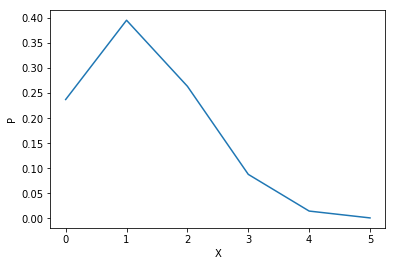

In [5]:
plt.plot(x_values, distribution) # график закона распределения
plt.xlabel('X')
plt.ylabel('P');

### Задача 2
Вероятность попадания в цель при одном выстреле равна 0.01. Какова вероятность того, что число попаданий при 200 выстрелах будет не менее 5 и не более 10?

In [6]:
n = 200 # Всего выстрелов
p = 0.01 # Вероятность попадания в цель за 1 выстрел
k_values = np.arange(5, 11) # массив требуемых успешных попаданий
a = n * p

In [7]:
def Poisson(a, k):
    """Функция возвращает распределение Пуассона"""
    return (a ** k) * (np.exp(-a)) / np.math.factorial(k)

In [8]:
result = 0
for k in k_values:
    result += Poisson(a, k)    
result # Ответ на задачу

0.052644709119342686

### Задача 3
В условиях предыдущей задачи сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 10 раз будет совершено попадание?

Подсказка. Как посчитать P(X >= k) для величины X, имеющей распределение Пуассона? Здесь предстоит немножко покодить.

In [9]:
n_values = np.arange(10, 2000) # Рассматриваемый диапазон выстрелов
target = 10 # минимальное требуемое количество попаданий
target_prob = 0.9 # требуемая вероятность
result = 0 # минимальное количество выстрелов, чтобы достичь цели
k_values = np.arange(0, target) # берем k от 0 до 9
for n in n_values: # пробегаемся по n     
    a = n * p
    prob = 0 # вероятность того, что для n попаданий будет меньше 10
    for k in k_values:
        prob += Poisson(a, k)    
    if  1 - prob >= target_prob: # сравниваем обратную вероятность (попадут как минимум 10) с целевой
        result = n # записываем результат
        break # прерываем цикл

In [10]:
print(f'требуется совершить минимум {result} выстрел')

требуется совершить минимум 1421 выстрел
